____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Docente: Martin Palazzo__\
__Ciencia de Datos - Curso I5521 - Turno Sabado Mañana__
____

In [ ]:
print(__doc__)


# Code intially obtained from 
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

# This version has been modified and adapted by Martin Palazzo for the ClusterAI 2020 course.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression

def classifiers_moons(dset = 'moons', test_frac = 0.4, param_c = 0.1, param_gamma = 2, lr_penalization = None):

  h = .02  # step size in the mesh

  names = ["Linear SVM", "RBF SVM", "Logistic Regression"]

  classifiers = [
      SVC(kernel="linear", C=param_c),
      SVC(gamma=param_gamma, C=param_c),
      LogisticRegression(C = param_c , penalty = lr_penalization )]

  X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                            random_state=1, n_clusters_per_class=2)
  rng = np.random.RandomState(2)
  X += 2 * rng.uniform(size=X.shape)
  linearly_separable = (X, y)

  if dset == 'moons':
    datasets = [make_moons(noise=0.2, random_state=10,n_samples=200)]
  elif dset == 'circles':
    datasets = [make_circles(noise=0.2, factor=0.5, random_state=1, n_samples = 200)]
  elif dset == 'lin_sep':
    datasets = [linearly_separable]

  figure = plt.figure(figsize=(27, 9))
  i = 1
  # iterate over datasets
  for ds_cnt, ds in enumerate(datasets):
      # preprocess dataset, split into training and test part
      X, y = ds
      X = StandardScaler().fit_transform(X)
      X_train, X_test, y_train, y_test = \
          train_test_split(X, y, test_size=test_frac, random_state=42)

      x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
      y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))

      # just plot the dataset first
      cm = plt.cm.RdBu
      cm_bright = ListedColormap(['#FF0000', '#0000FF'])
      ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
      if ds_cnt == 0:
          ax.set_title("Input data")
      # Plot the training points
      ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                edgecolors='k', s = 150)
      # Plot the testing points
      ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                edgecolors='k', s = 150, marker =  '^')
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xticks(())
      ax.set_yticks(())
      i += 1

      # iterate over classifiers
      for name, clf in zip(names, classifiers):
          ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
          clf.fit(X_train, y_train)
          score = clf.score(X_test, y_test)
          score_tr = clf.score(X_train, y_train)

          # Plot the decision boundary. For that, we will assign a color to each
          # point in the mesh [x_min, x_max]x[y_min, y_max].
          if hasattr(clf, "decision_function"):
              Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
          else:
              Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

          # Put the result into a color plot
          Z = Z.reshape(xx.shape)
          ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

          # Plot the training points
          ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                    edgecolors='k', s = 150)
          # Plot the testing points
          ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                    edgecolors='k', alpha=0.8, s = 150, marker =  '^')

          ax.set_xlim(xx.min(), xx.max())
          ax.set_ylim(yy.min(), yy.max())
          ax.set_xticks(())
          ax.set_yticks(())
          if ds_cnt == 0:
              ax.set_title(name)
          ax.text(xx.max() - .3, yy.min() + .10, ('Test acc.%.2f' % score).lstrip('0'),
                  size=35, horizontalalignment='right')
          
          ax.text(xx.max() - .3, yy.min() + .45, ('Train acc.%.2f' % score_tr).lstrip('0'),
                  size=35, horizontalalignment='right')
          i += 1

  plt.tight_layout()
  plt.show()

Automatically created module for IPython interactive environment


____
__Dataset: Moons__\
__Regularization: Low__
____

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


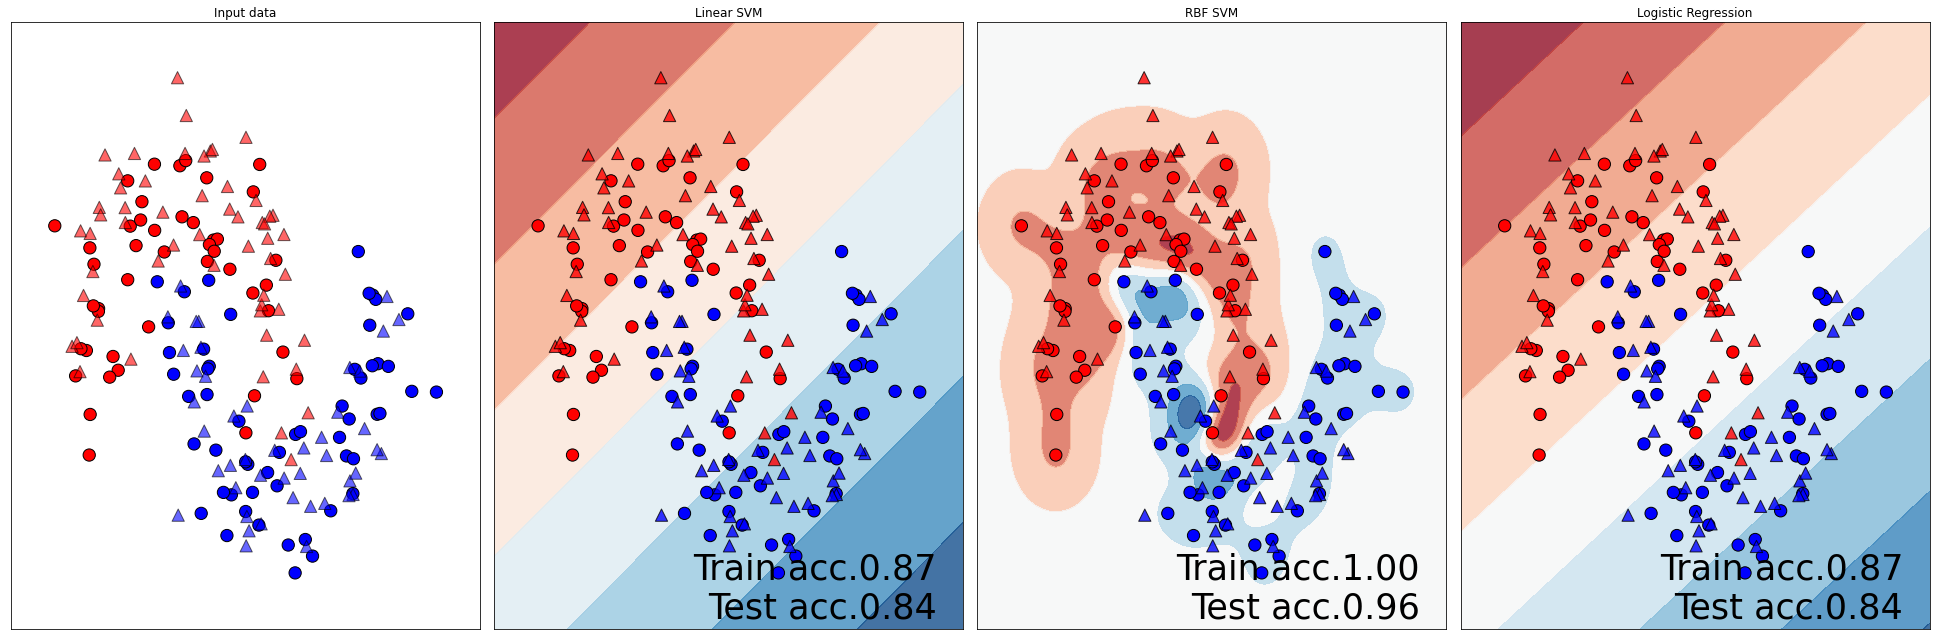

In [ ]:
classifiers_moons(dset= 'moons',  test_frac= 0.5, param_c = 100, param_gamma = 10, lr_penalization = 'none')

____
__Dataset: Moons__\
__Regularization: Mid__
____

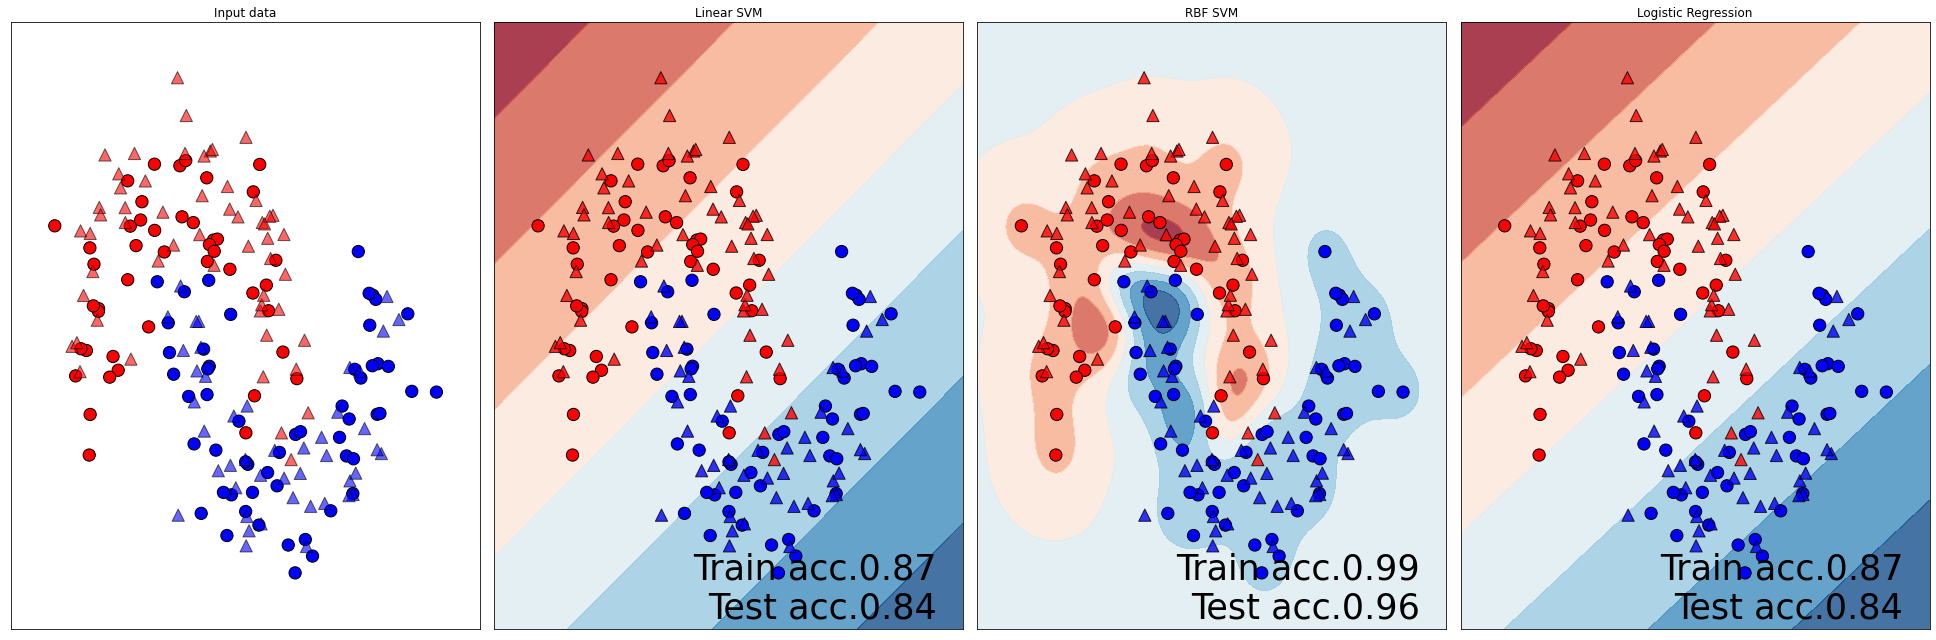

In [ ]:
classifiers_moons( dset= 'moons', test_frac= 0.5, param_c = 10, param_gamma = 5, lr_penalization = 'l2')

____
__Dataset: Moons__\
__Regularization: High__
____

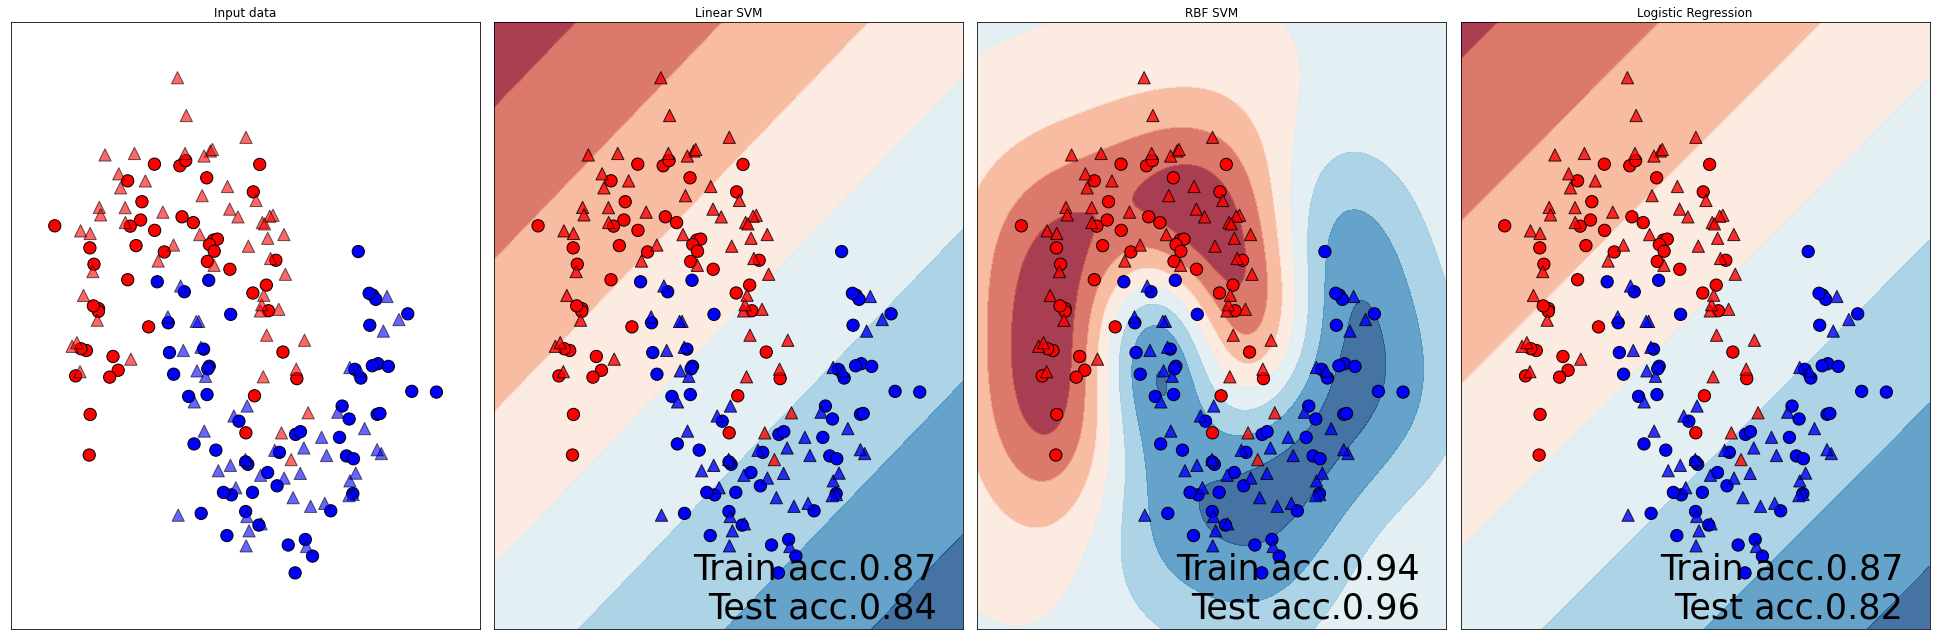

In [ ]:
classifiers_moons( dset= 'moons', test_frac= 0.5, param_c = 1, param_gamma = 1, lr_penalization = 'l2')

____
__Dataset: Circles__\
__Regularization: Low__
____

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


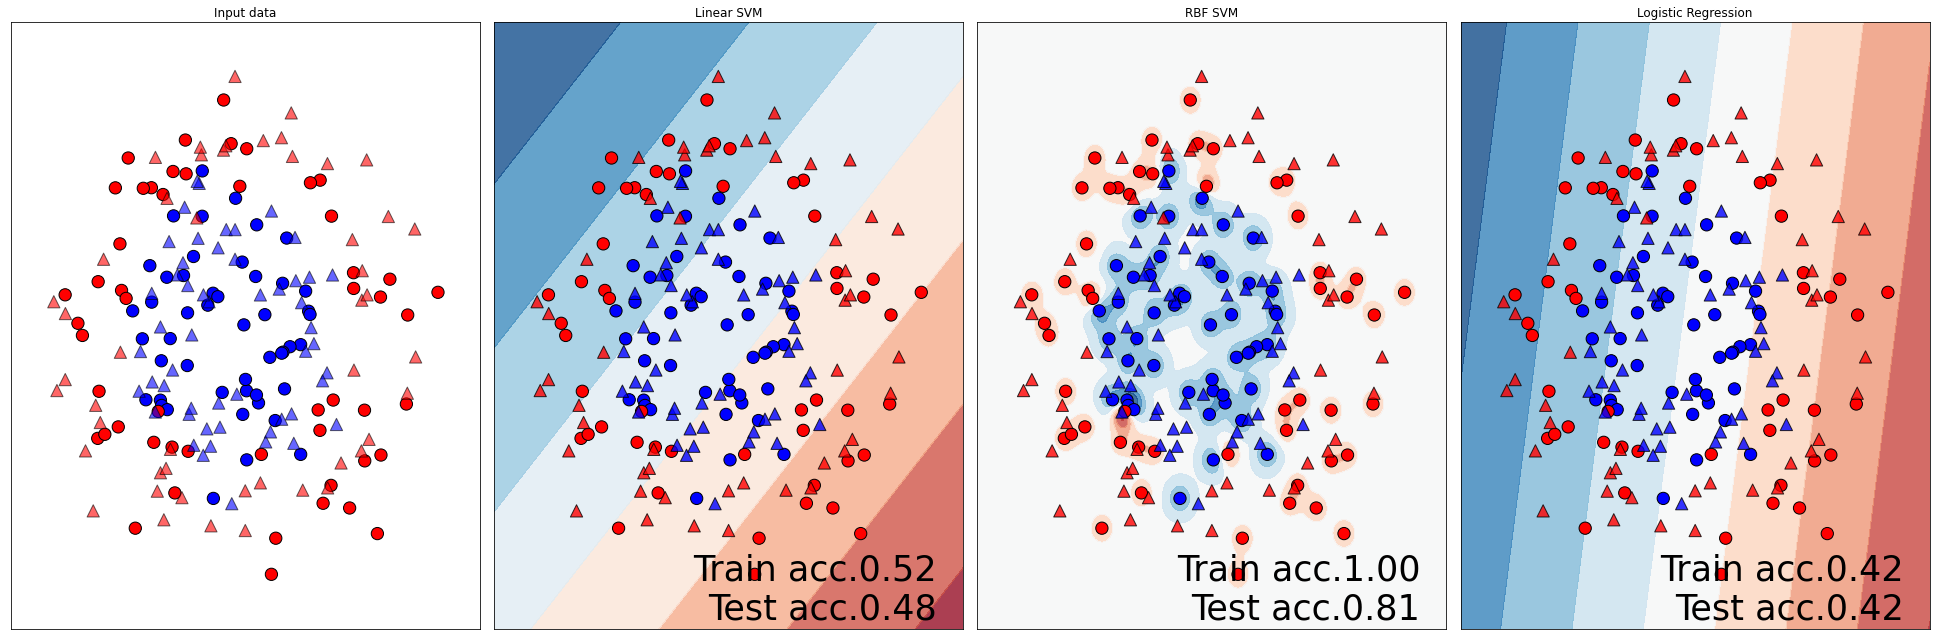

In [ ]:
classifiers_moons( dset= 'circles', test_frac= 0.5, param_c = 100, param_gamma = 50, lr_penalization = 'none')

____
__Dataset: Circles__\
__Regularization: Mid__
____

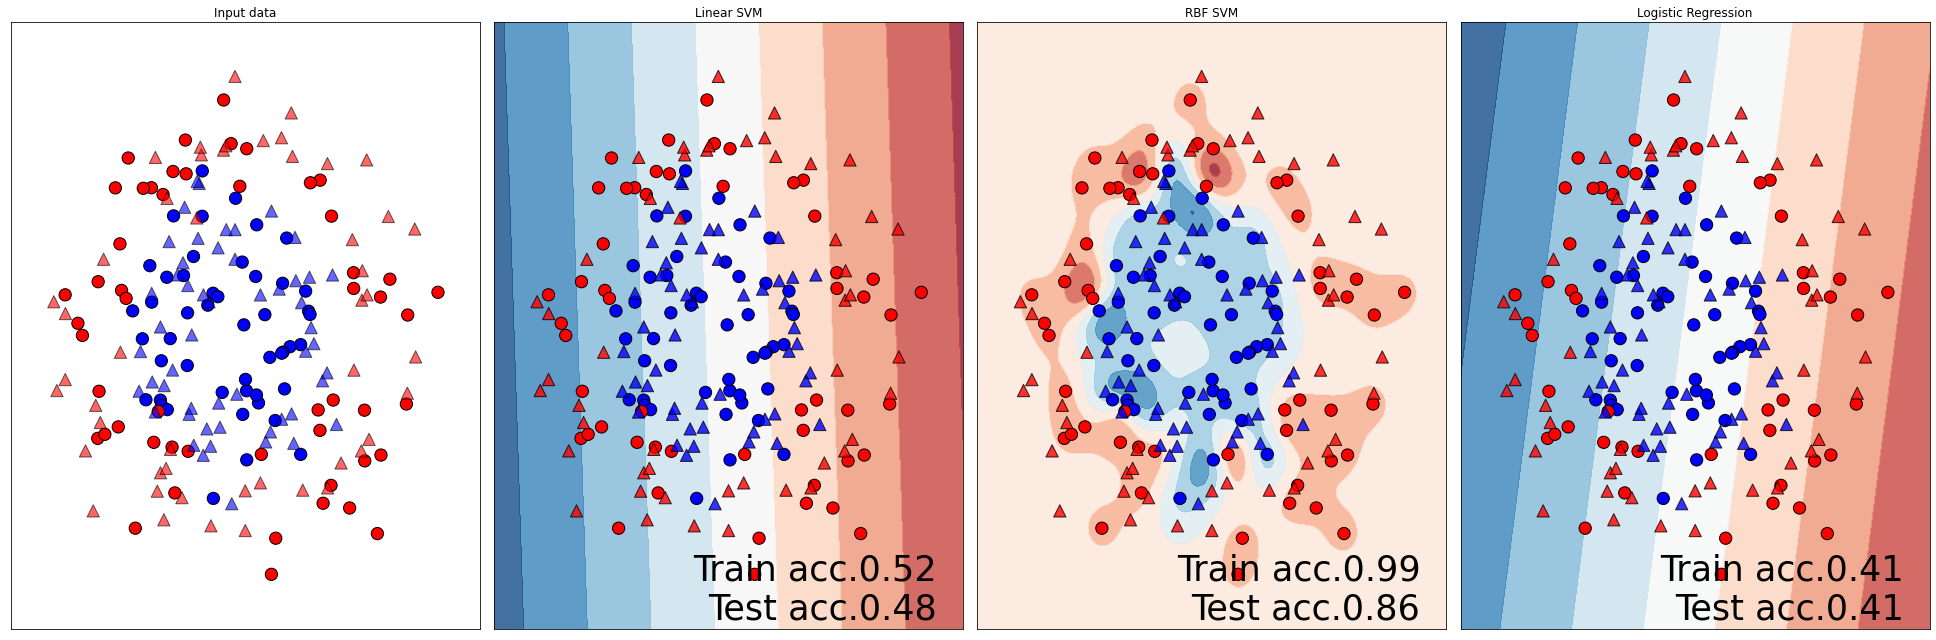

In [ ]:
classifiers_moons( dset= 'circles', test_frac= 0.5, param_c = 10, param_gamma = 10, lr_penalization = 'l2')

____
__Dataset: Circles__\
__Regularization: High__
____

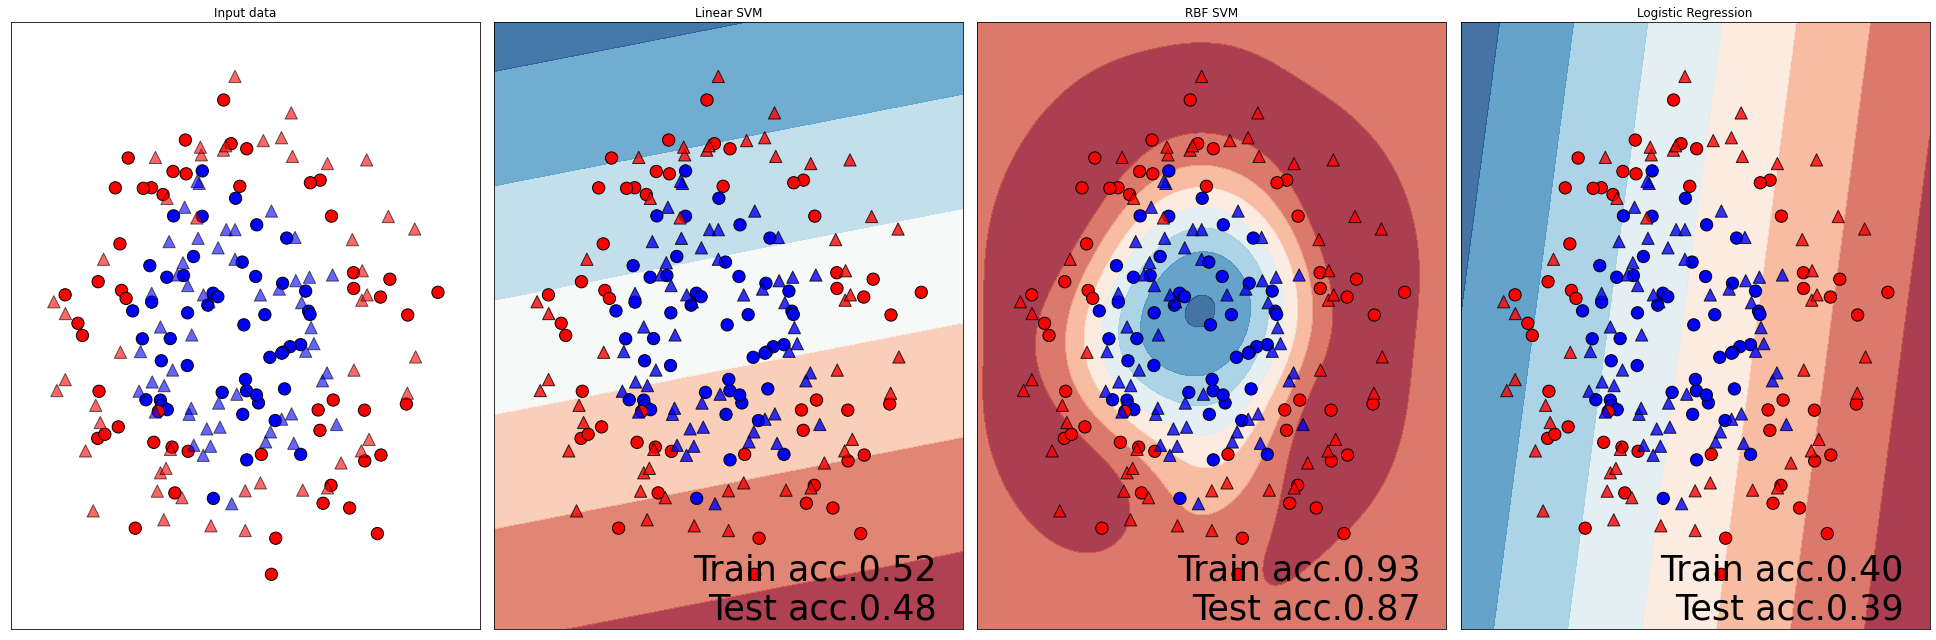

In [ ]:
classifiers_moons( dset= 'circles', test_frac= 0.5, param_c = 1, param_gamma = 1, lr_penalization = 'l2')

____
__Dataset: Circles__\
__Regularization: High__
____

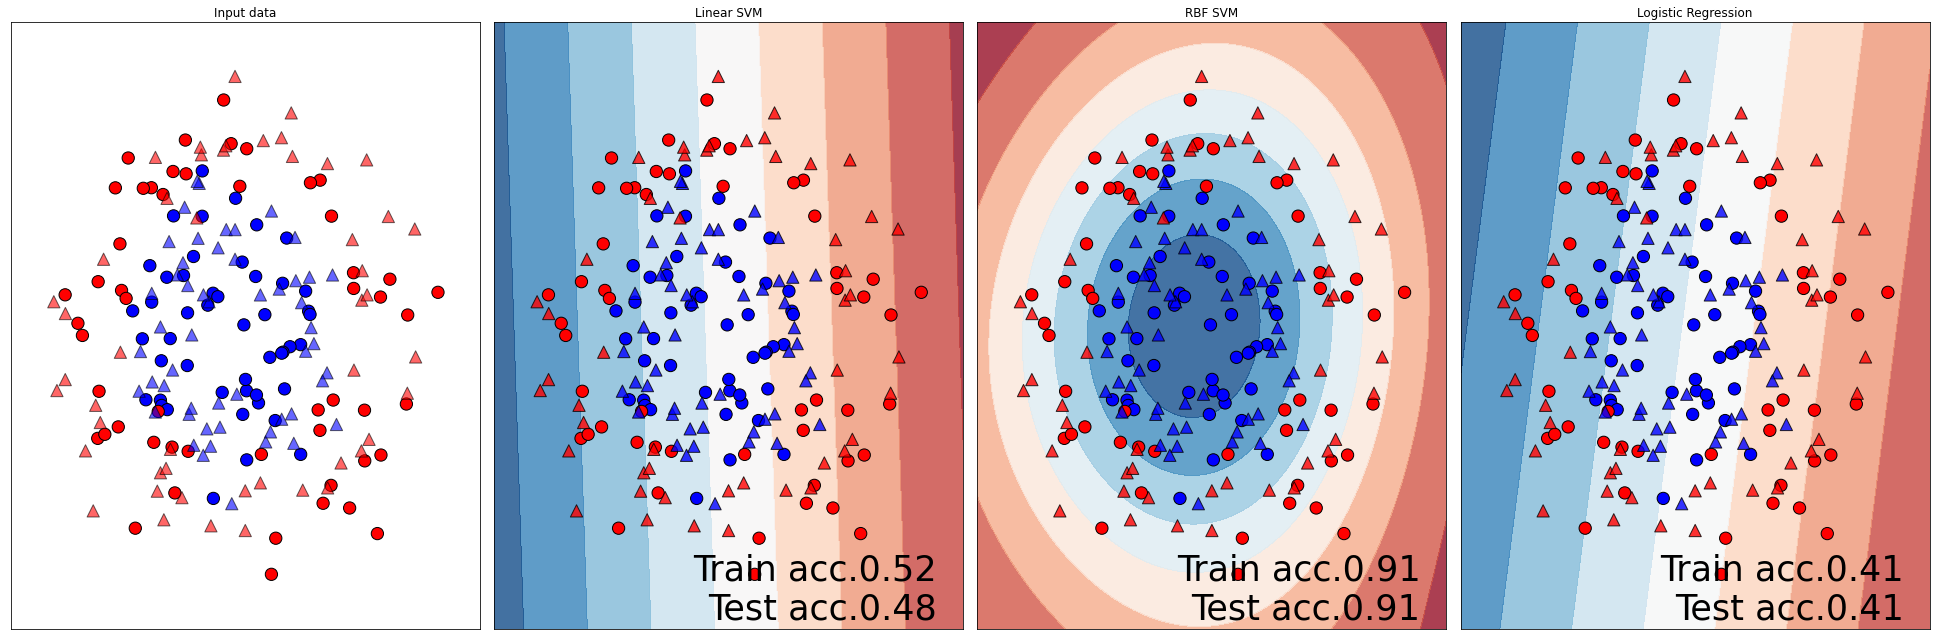

In [ ]:
classifiers_moons( dset= 'circles', test_frac= 0.5, param_c = 10, param_gamma = 0.1, lr_penalization = 'l2')

____
__Dataset: Linearly separable__\
__Regularization: Low__
____

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


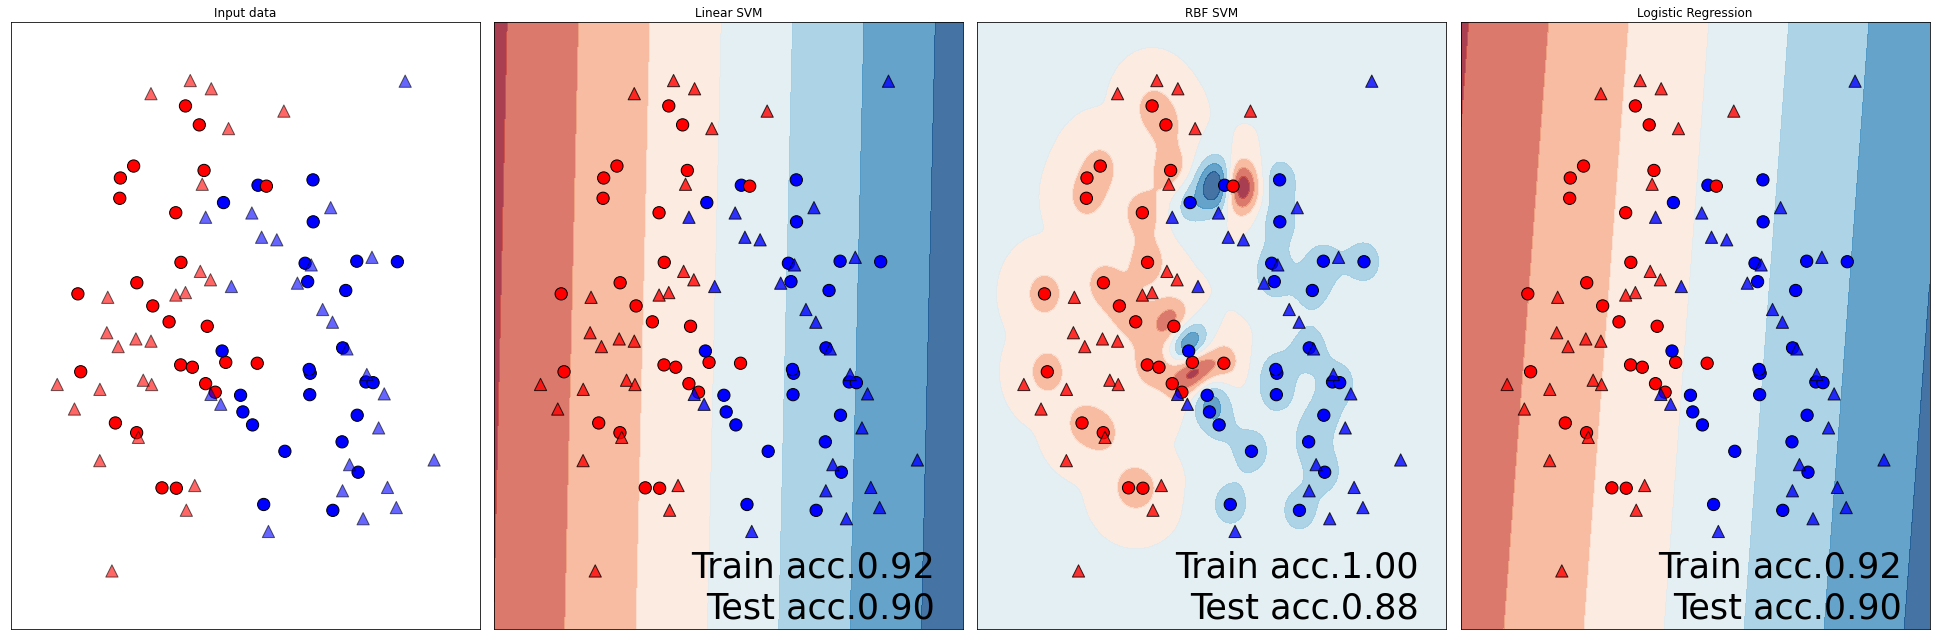

In [ ]:
classifiers_moons( dset= 'lin_sep', test_frac= 0.5, param_c = 100, param_gamma = 20, lr_penalization = 'none')

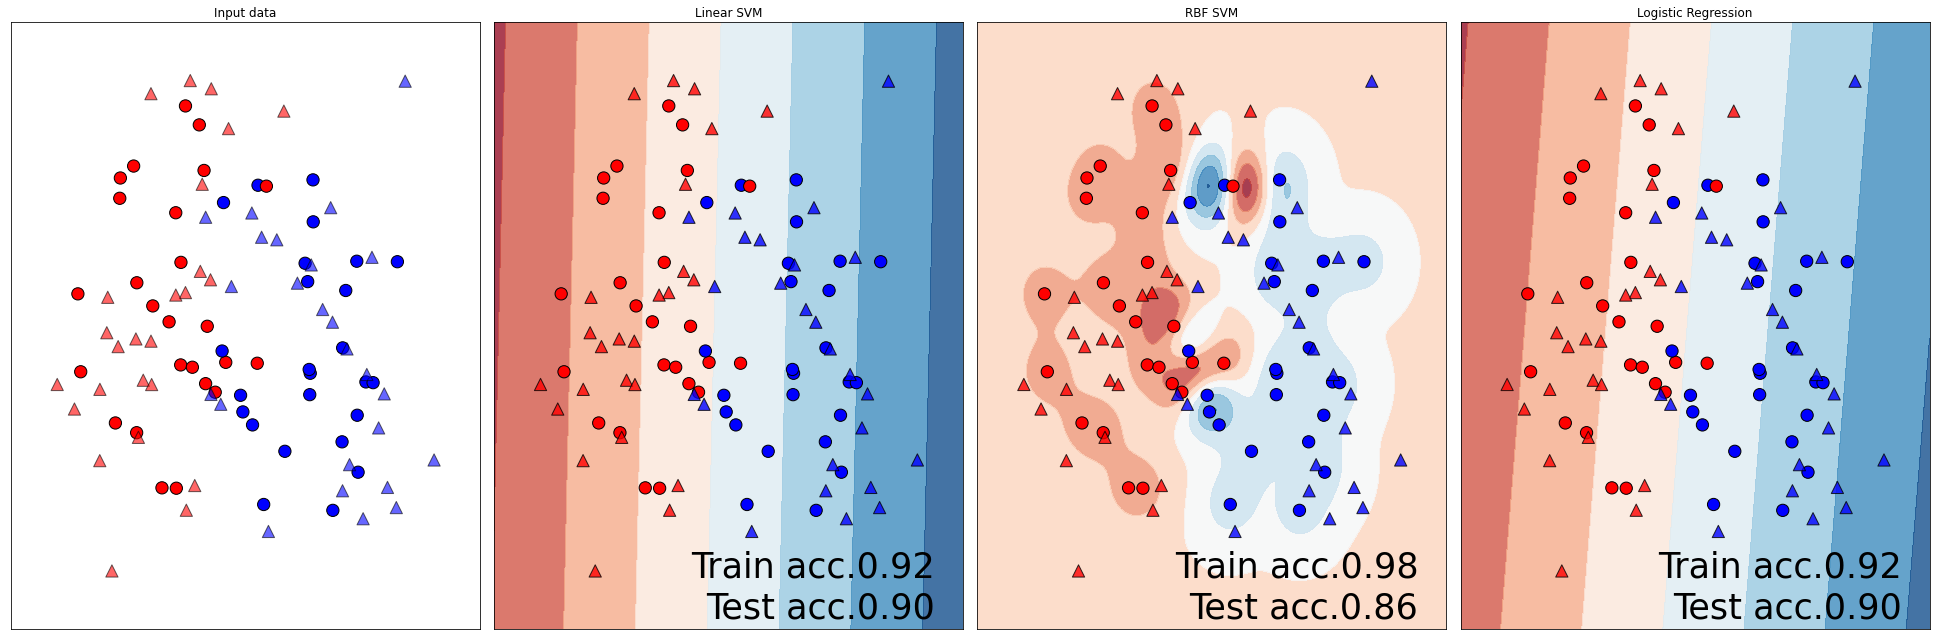

In [ ]:
classifiers_moons( dset= 'lin_sep', test_frac= 0.5, param_c = 10, param_gamma = 10, lr_penalization = 'l2')

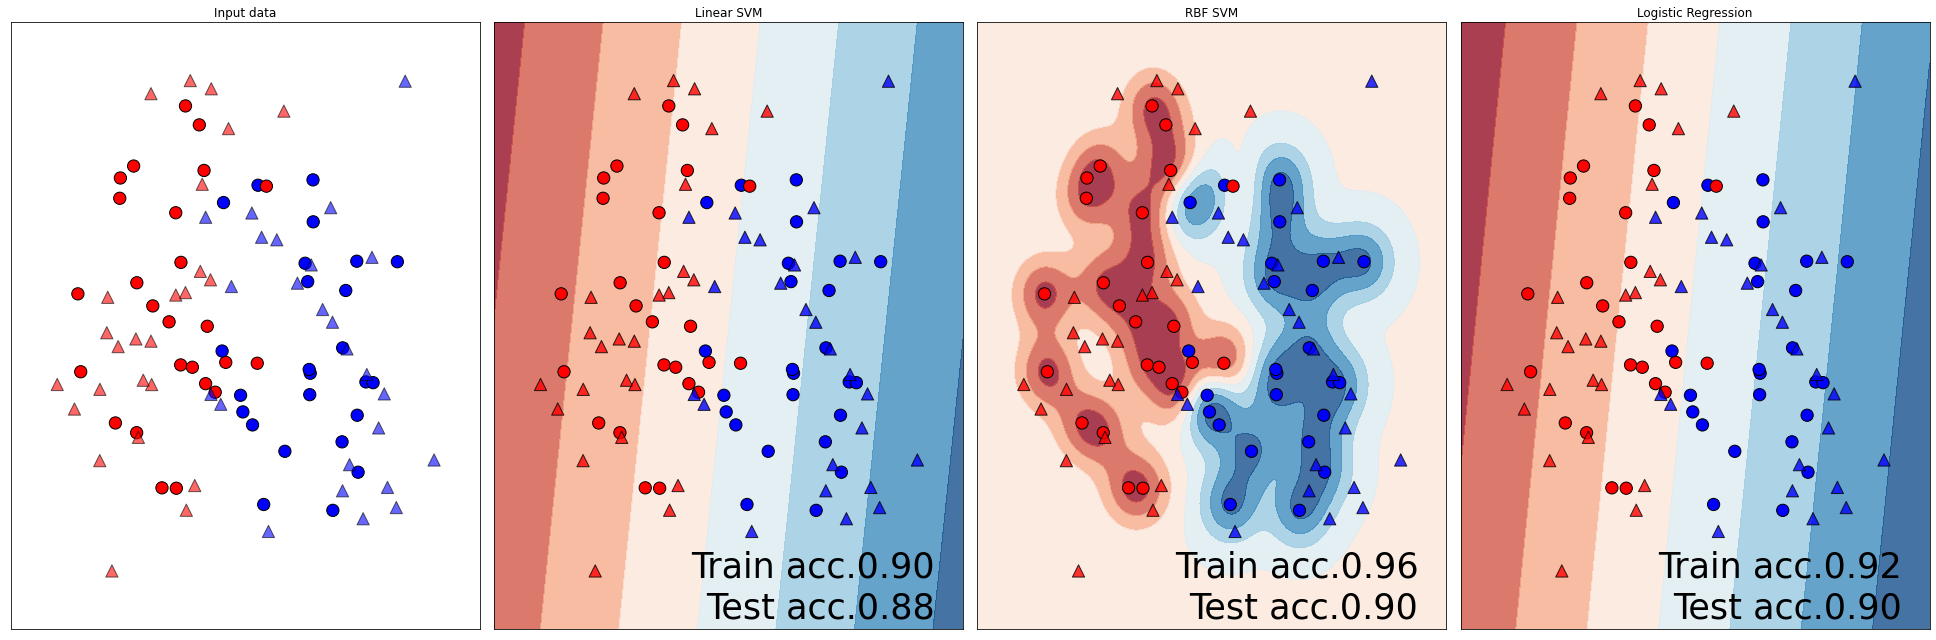

In [ ]:
classifiers_moons( dset= 'lin_sep', test_frac= 0.5, param_c = 1, param_gamma = 10, lr_penalization = 'l2')

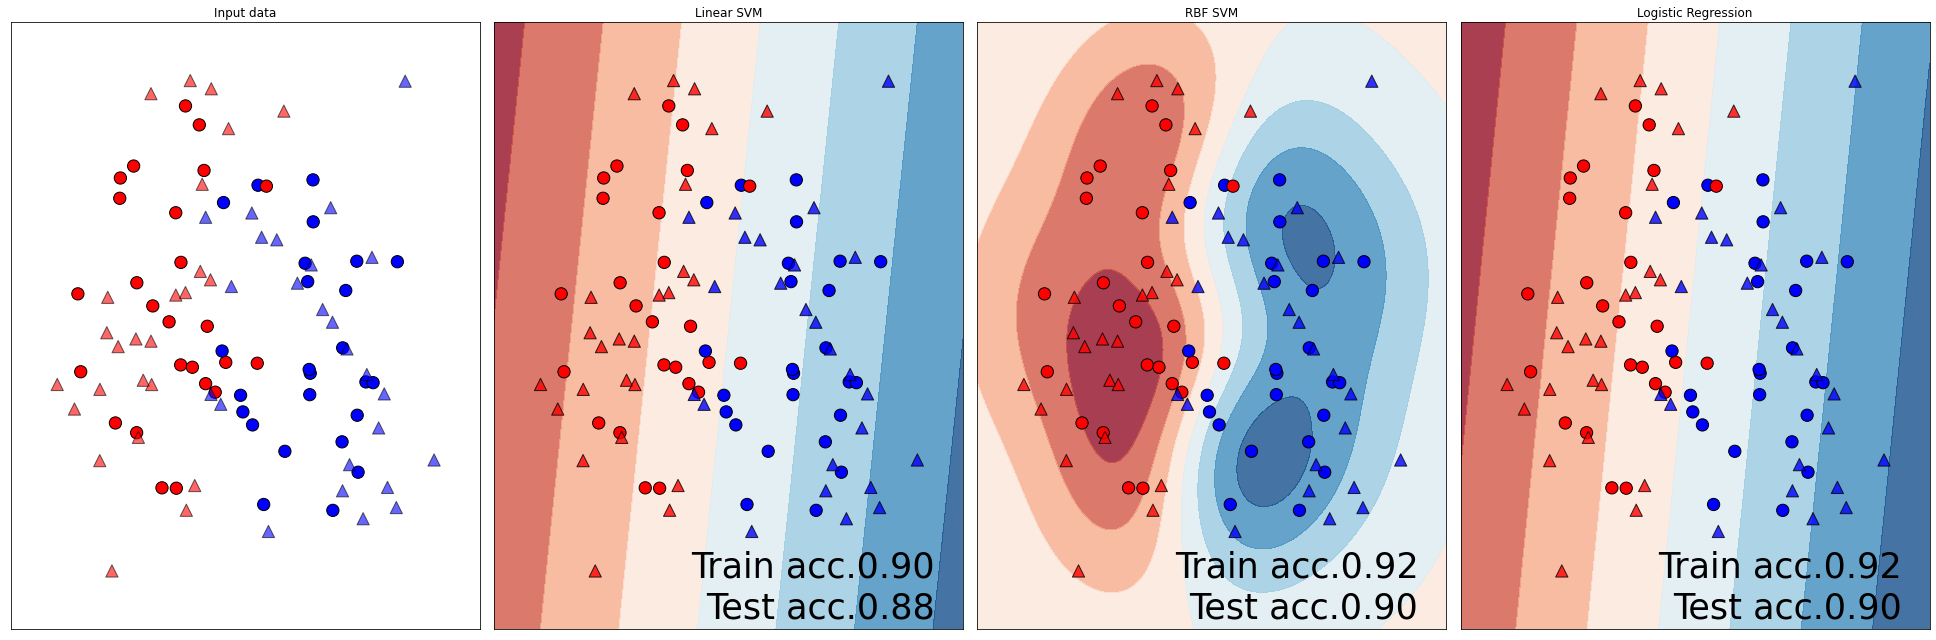

In [ ]:
classifiers_moons( dset= 'lin_sep', test_frac= 0.5, param_c = 1, param_gamma = 1, lr_penalization = 'l2')